In [19]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ads_evt as spot
import os

## For one file

4031


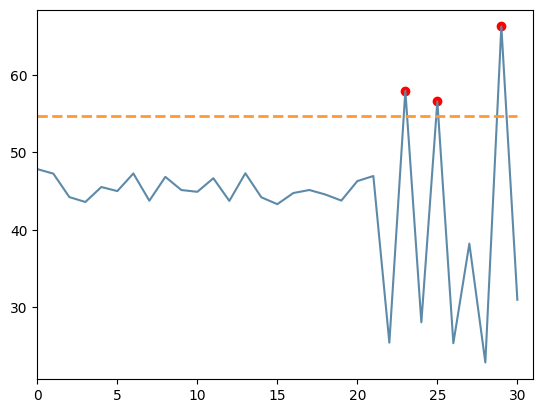

In [16]:
# Load the data from the CSV file
file_path = "../../Datasets/TSB-AD-U/001_NAB_id_1_Facility_tr_1007_1st_2014.csv"  # Replace with the actual path to your file
df = pd.read_csv(file_path)
data = df['Data'].values  # Extract the 'Data' column as a NumPy array
print(len(data))
init_data = 2000
proba = 1e-3
depth = 450

models: List[spot.SPOTBase] = [
    # Uncomment the desired algorithms to run
    spot.SPOT(q=proba),
    # spot.dSPOT(q=proba, depth=depth),
    # spot.biSPOT(q=proba),
    # The original implementation of bidSPOT uses n_points=8 for _grimshaw by default
    # spot.bidSPOT(q=proba, depth=depth, n_points=8),
]

for alg in models:
    # plots len(data)-init_data points
    alg.fit(init_data=init_data, data=data)
    alg.initialize()
    results = alg.run()
    # Plot
    figs = alg.plot(results)
    plt.show()


In [18]:
results['alarms']

[23, 25, 29]

## For many files

In [20]:
PRECOMPUTED_AD_SCORES_OF_DATASET = 'NORMA'
PRECOMPUTED_AD_SCORES_DIRECTORY = f'../../Datasets/TSB-AD-Results-Some-Folders/{PRECOMPUTED_AD_SCORES_OF_DATASET}'
# DATASET_DIRECTORY = '../../Datasets/TSB-AD-U'
# FILES_TO_BE_USED_FILEPATH = "../../Datasets/File_List/TSB-AD-U-Eva.csv"
DATASET_DIRECTORY = "C:/Kogal All my Files/Master/Diploma Thesis/TSB-AD/Datasets/TSB-AD-U"
FILES_TO_BE_USED_FILEPATH = "C:/Kogal All my Files/Master/Diploma Thesis/TSB-AD/Datasets/File_List/TSB-AD-U-Eva.csv"

In [38]:
file_list_df = pd.read_csv(FILES_TO_BE_USED_FILEPATH)
file_names = file_list_df['file_name'].tolist()  # List of file names to load

# Initialize a list to store DataFrames
data_dict = {}

# Iterate through the file names
for file_name in file_names:
    file_path = os.path.join(DATASET_DIRECTORY, file_name)
    if os.path.isfile(file_path):  # Check if the file exists
        df = pd.read_csv(file_path)  # Load the CSV file
        data_dict[file_name] = {
            'raw_data': df['Data'].to_numpy(),
            'labels': df['Label'].to_list()
        }
    else:
        print(f"File not found: {file_path}")
print(len(data_dict))

350


In [ ]:
data_dict['001_NAB_id_1_Facility_tr_1007_1st_2014.csv']['labels']
data_dict['001_NAB_id_1_Facility_tr_1007_1st_2014.csv']['raw_data']

array([47.606, 42.58 , 46.03 , ..., 22.864, 66.26 , 30.962])

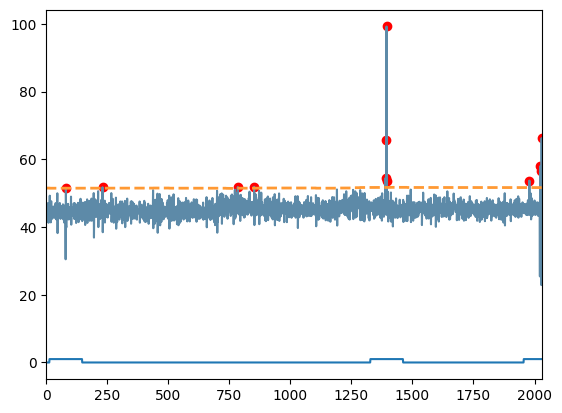

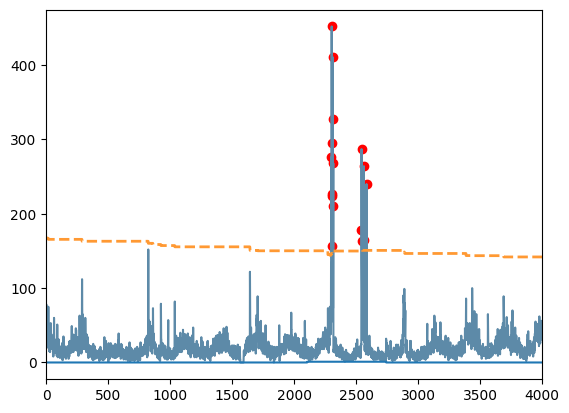

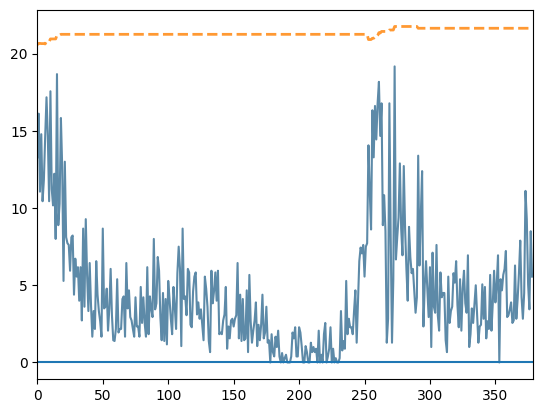

In [ ]:
# Load the data from the CSV file
init_data = 2000
proba = 1e-3
depth = 450

models: List[spot.SPOTBase] = [
    # Uncomment the desired algorithms to run
    spot.SPOT(q=proba),
    # spot.dSPOT(q=proba, depth=depth),
    # spot.biSPOT(q=proba),
    # The original implementation of bidSPOT uses n_points=8 for _grimshaw by default
    # spot.bidSPOT(q=proba, depth=depth, n_points=8),
]
keep_many_files = 3
i=1
for filename, data in data_dict.items():
    raw_data, labels = data.values()
    for alg in models:
        # plots len(data)-init_data points
        alg.fit(init_data=init_data, data=raw_data)
        alg.initialize()
        results = alg.run()
        # Plot
        figs = alg.plot(results)
        plt.plot(labels[init_data:])#!
        plt.show()
    if keep_many_files <= i:
        break
    i+=1

In [ ]:
from SPOT_Detector import SPOT

keep_many_files = 3
i=1

models = [SPOT(risk=proba)]

for filename, data in data_dict.items():
    raw_data, labels = data.values()
    for alg in models:
        # plots len(data)-init_data points
        alg.fit(init_data=init_data, data=raw_data, )
        alg.predict(raw_data)
        # alg.initialize()
        # results = alg.run()
        # Plot
        figs = alg.plot(results)
        plt.plot(labels[init_data:])
        plt.show()
    if keep_many_files <= i:
        break
    i+=1